## Understanding the Uptake of Vaccination among Demographic Feature!

## Overview
This Analysis aims to understand the correlation between individuals' backgrounds, opinions, and health behaviors and their personal vaccination patterns, with a focus on the H1N1 and seasonal flu vaccines. The research will use data collected in the National 2009 H1N1 Flu Survey to predict whether people received the H1N1 or seasonal flu vaccine, utilizing binary classification methods. The results of this study will provide valuable insights for future public health efforts in the fight against COVID-19.


## Business Problem

The global population's successful vaccination against COVID-19 is a major challenge facing public health efforts. An understanding of the factors that influence people's personal vaccination patterns, such as their backgrounds, opinions, and health behaviors, can help guide future public health strategies. The study will address this issue by using data from the National 2009 H1N1 Flu Survey to predict whether individuals received the H1N1 or seasonal flu vaccine, which will provide valuable information for future public health efforts.


## Data

The data used is a collection of responses from people regarding the H1N1 and seasonal flu vaccines that they received. The data includes columns for demographic information, such as age, gender, and location, as well as information on the respondents' opinions and health behaviors. The goal of this data is to understand how different factors, such as background and opinions, are related to personal vaccination patterns. This information can be used to guide future public health efforts in the distribution of vaccines. The data is organized as a CSV file, where each row represents one person who responded to the survey, and each column represents a different aspect of their response.

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

## Loading the training and testing datasets

In [23]:
# Load the data and pre-process it
X_train = pd.read_csv("C:/Users/This PC/Downloads/training_set_features.csv")
X_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


#### Setting the 'respondent_id' column as the index

In [24]:
X_train_copy = X_train.copy()
X= X_train_copy.set_index("respondent_id")
X.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [25]:
# Loading Y 
Y = pd.read_csv("C:/Users/This PC/Downloads/training_set_labels.csv")
Y.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [26]:
Y_copy = Y.copy()
Y= Y_copy.set_index("respondent_id")
Y.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [27]:
Y = Y.drop(index=1)

## Data Cleaning

In [28]:
# Get the shape of the data (number of rows, number of columns)
print("Data Shape:", X.shape)

Data Shape: (26707, 35)


In [29]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [30]:
for col in X.columns:
    column = X[col]
    value_counts = column.value_counts()
    print(value_counts)

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64
1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64
0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64
0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64
0.0    23004
1.0     2899
Name: health_worker, dtype: int64
1.0    12697
0.0     1736
Name

#### Data understanding

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

 ### Dealing with missing values
From the output, it was observed that certain columns exhibited missing values. The employment_industry, employment_occupation, and health_insurance columns had a high number of missing values, thus they were dropped. The remaining missing values were imputed using the mode of each respective column. No outliers were detected as the majority of the variables were categorical in nature.


In [32]:
# dropping the employment_industry, employment_occupation, and health_insurance columns

X1 = X.drop(columns=["employment_industry", "employment_occupation", "health_insurance"])
X1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [33]:
# Calculating the mode of each column
mode = X1.mode().iloc[0]

# Replacing missing values with the mode of each respective column
X1.fillna(mode, inplace=True)

In [34]:
X1.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

### Checking for duplicates


In [35]:
# checking sum of duplicated entries in the dataset
X1.duplicated().sum()

1

In [36]:
# dropping the duplicated entry
X1.drop_duplicates(inplace = True)
X1.duplicated().sum()

0

### Converting data into a numerical format 

As noted earlier, some entries are not in numerical format but are categorical. Here, we will convert the data into numeric format.

In [37]:
from sklearn.preprocessing import LabelEncoder
columnss = ['census_msa', 'hhs_geo_region','employment_status','rent_or_own','marital_status','income_poverty','sex','age_group',
'race','education']

enc = LabelEncoder()
X1[columnss] = X1[columnss].apply(enc.fit_transform)
X1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,8,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,1,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,9,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,5,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,9,0,1.0,0.0


### Converting Data types


In [38]:
for i in X1.columns:
      if X1[i].dtype == 'float64' or X1[i].dtype =='int32':
                 X1[i] = X1[i].astype('int64')
                
print(X1.dtypes)

h1n1_concern                   int64
h1n1_knowledge                 int64
behavioral_antiviral_meds      int64
behavioral_avoidance           int64
behavioral_face_mask           int64
behavioral_wash_hands          int64
behavioral_large_gatherings    int64
behavioral_outside_home        int64
behavioral_touch_face          int64
doctor_recc_h1n1               int64
doctor_recc_seasonal           int64
chronic_med_condition          int64
child_under_6_months           int64
health_worker                  int64
opinion_h1n1_vacc_effective    int64
opinion_h1n1_risk              int64
opinion_h1n1_sick_from_vacc    int64
opinion_seas_vacc_effective    int64
opinion_seas_risk              int64
opinion_seas_sick_from_vacc    int64
age_group                      int64
education                      int64
race                           int64
sex                            int64
income_poverty                 int64
marital_status                 int64
rent_or_own                    int64
e

# Exploratory Data Analysis

In [39]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26706 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   h1n1_concern                 26706 non-null  int64
 1   h1n1_knowledge               26706 non-null  int64
 2   behavioral_antiviral_meds    26706 non-null  int64
 3   behavioral_avoidance         26706 non-null  int64
 4   behavioral_face_mask         26706 non-null  int64
 5   behavioral_wash_hands        26706 non-null  int64
 6   behavioral_large_gatherings  26706 non-null  int64
 7   behavioral_outside_home      26706 non-null  int64
 8   behavioral_touch_face        26706 non-null  int64
 9   doctor_recc_h1n1             26706 non-null  int64
 10  doctor_recc_seasonal         26706 non-null  int64
 11  chronic_med_condition        26706 non-null  int64
 12  child_under_6_months         26706 non-null  int64
 13  health_worker                26706 non-null  i

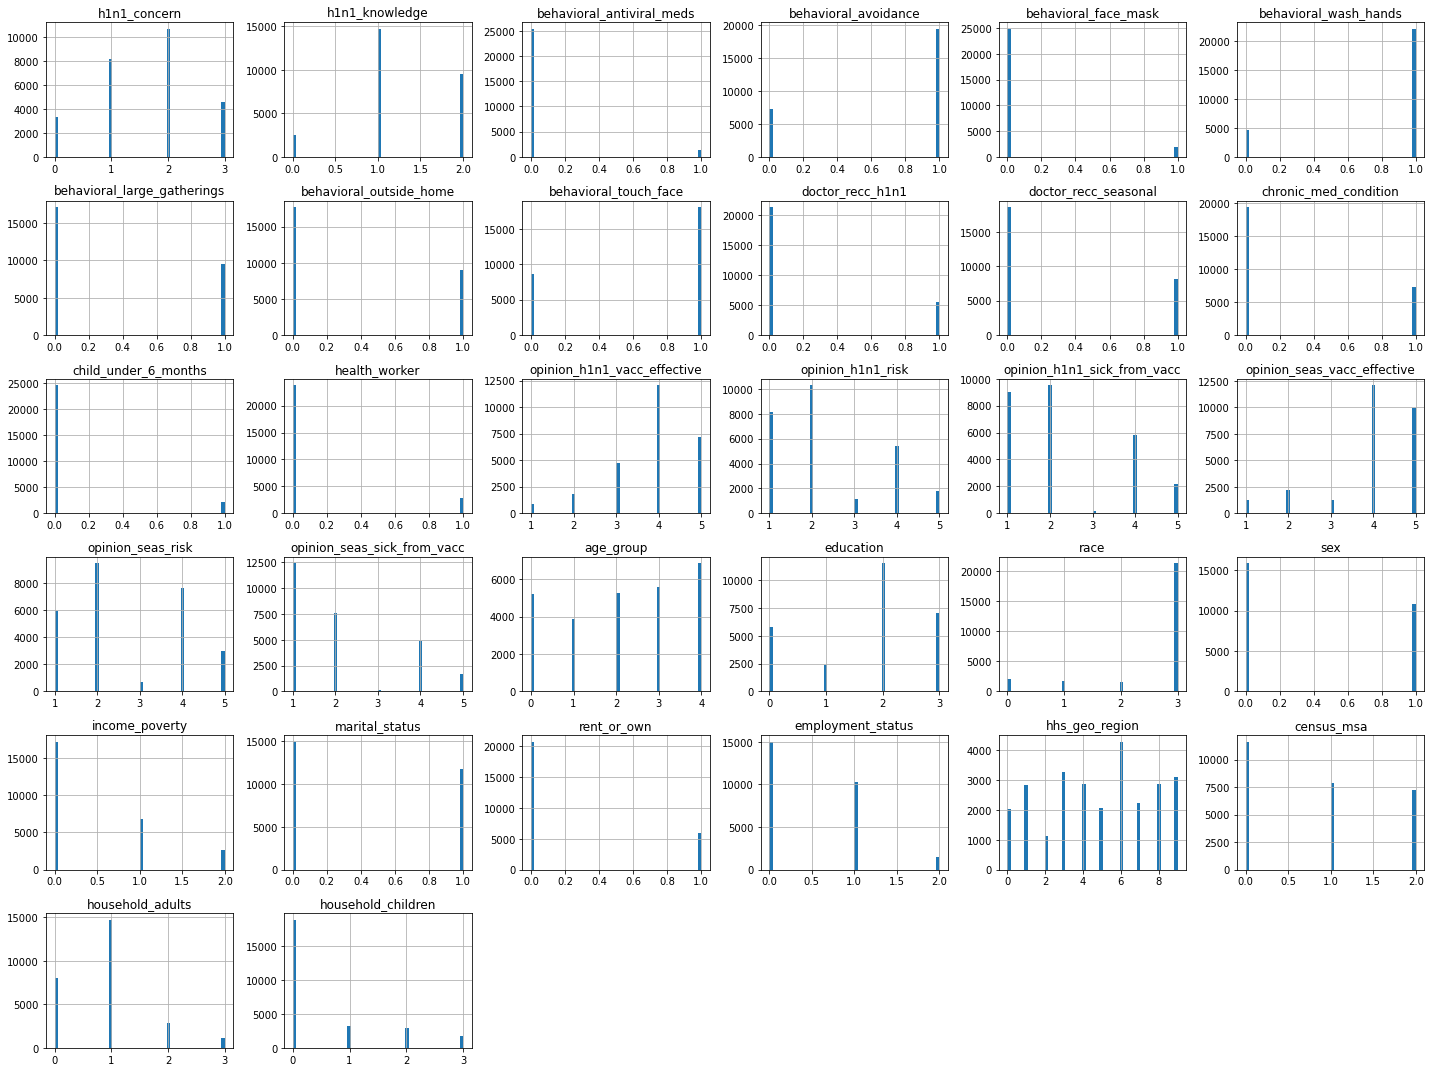

In [40]:
# Plot a histogram for each numerical column
X1.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [41]:
list(enumerate(X1.columns))

[(0, 'h1n1_concern'),
 (1, 'h1n1_knowledge'),
 (2, 'behavioral_antiviral_meds'),
 (3, 'behavioral_avoidance'),
 (4, 'behavioral_face_mask'),
 (5, 'behavioral_wash_hands'),
 (6, 'behavioral_large_gatherings'),
 (7, 'behavioral_outside_home'),
 (8, 'behavioral_touch_face'),
 (9, 'doctor_recc_h1n1'),
 (10, 'doctor_recc_seasonal'),
 (11, 'chronic_med_condition'),
 (12, 'child_under_6_months'),
 (13, 'health_worker'),
 (14, 'opinion_h1n1_vacc_effective'),
 (15, 'opinion_h1n1_risk'),
 (16, 'opinion_h1n1_sick_from_vacc'),
 (17, 'opinion_seas_vacc_effective'),
 (18, 'opinion_seas_risk'),
 (19, 'opinion_seas_sick_from_vacc'),
 (20, 'age_group'),
 (21, 'education'),
 (22, 'race'),
 (23, 'sex'),
 (24, 'income_poverty'),
 (25, 'marital_status'),
 (26, 'rent_or_own'),
 (27, 'employment_status'),
 (28, 'hhs_geo_region'),
 (29, 'census_msa'),
 (30, 'household_adults'),
 (31, 'household_children')]

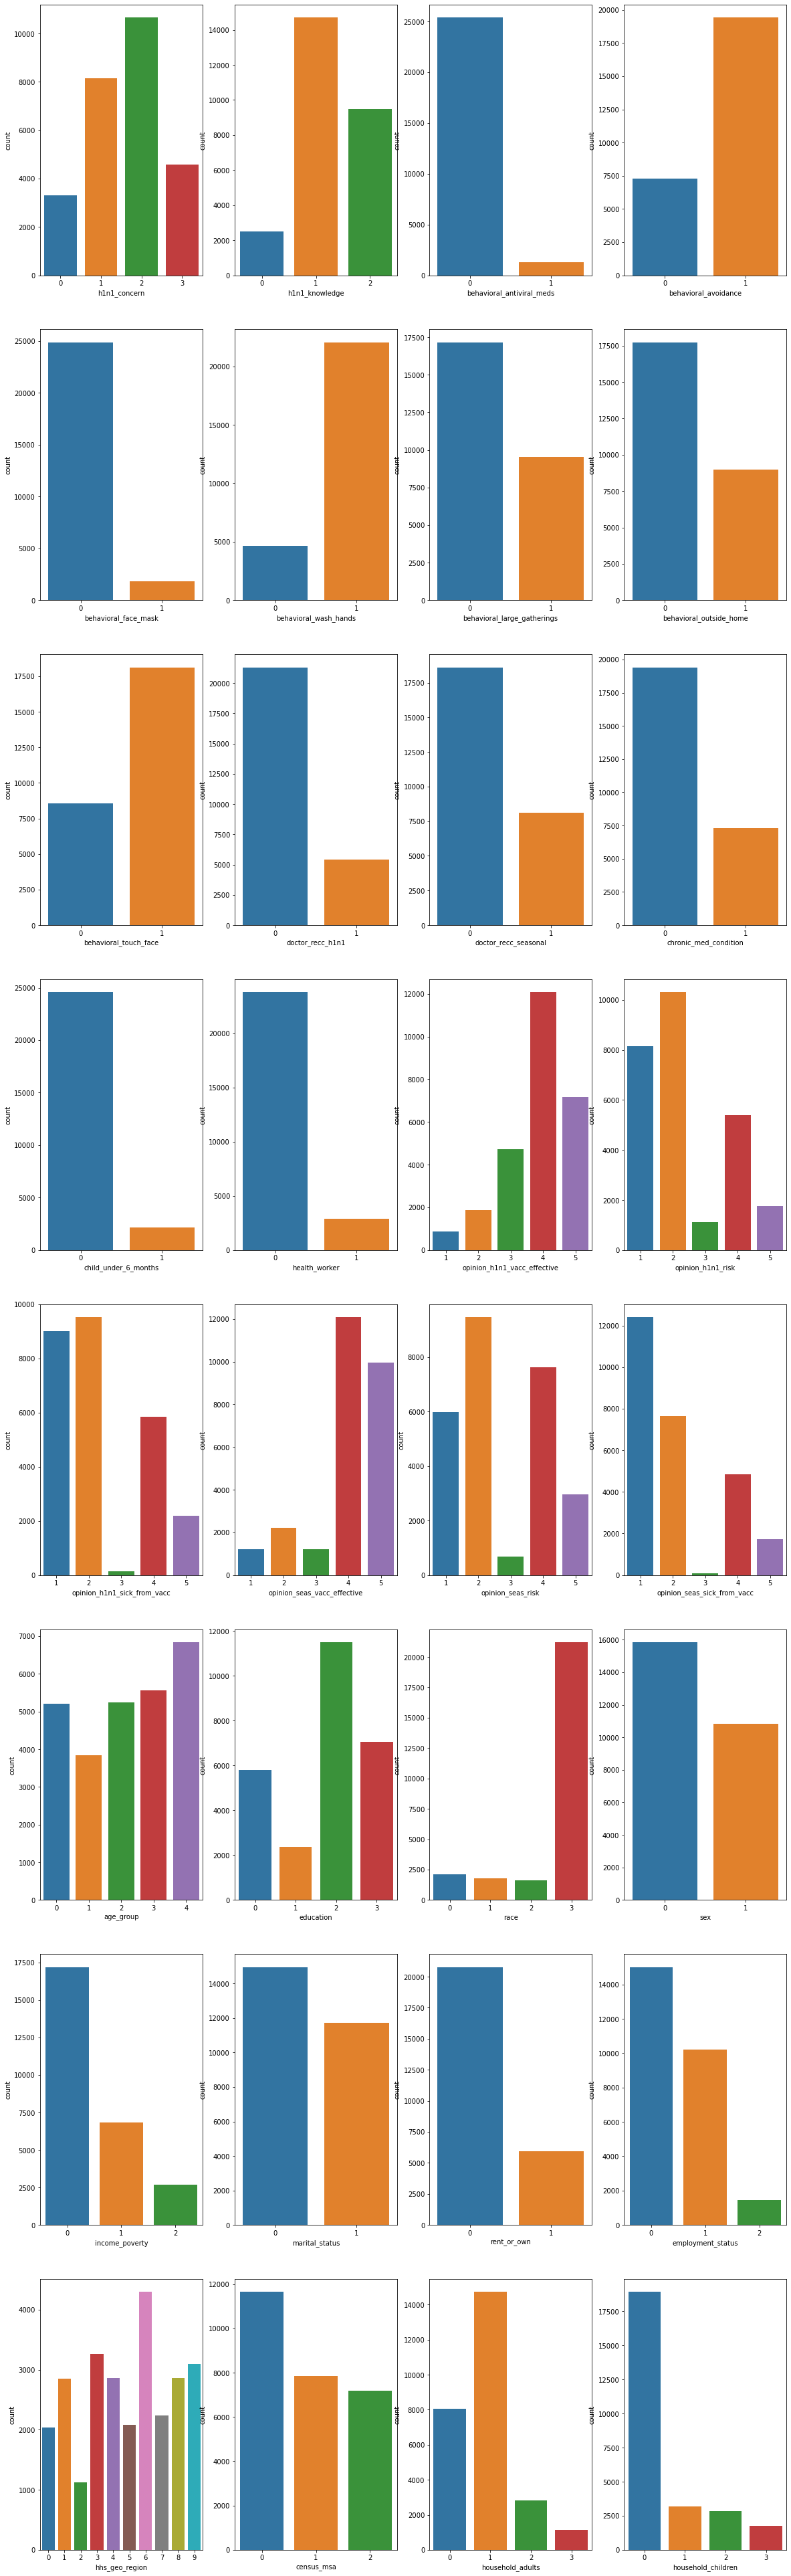

In [42]:
plt.figure(figsize=(20, 70))
for i in enumerate(X1.columns):
    plt.subplot(8,4,i[0]+1)
    sns.countplot(x = i[1], data= X1);

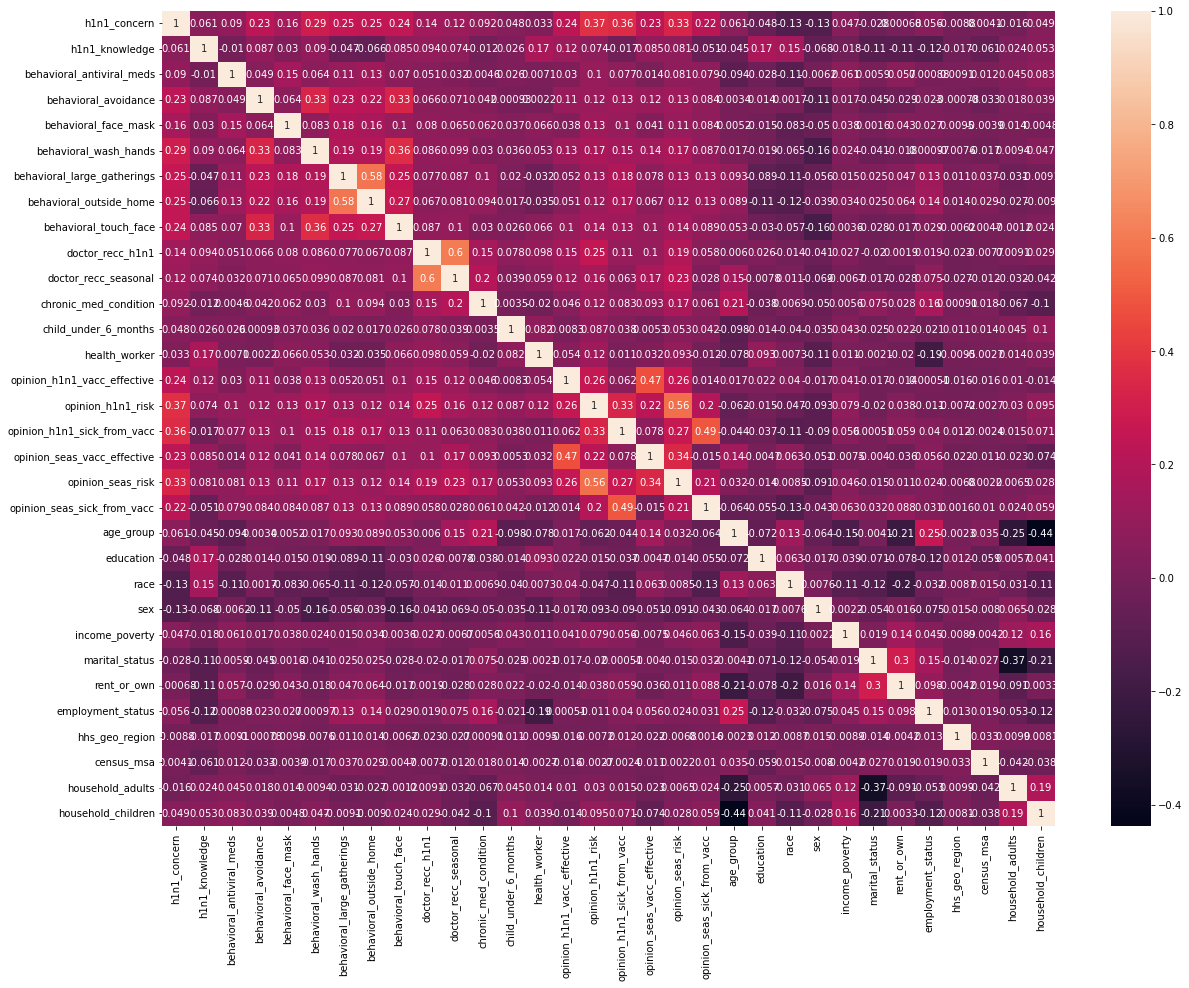

In [43]:
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(X1.corr(), annot=True)
plt.show()

## Feature selection

#### Feature selection using Lasso Regression

In [45]:
reg = Lasso(alpha=0.05)
reg.fit(X, y)

# Get the feature importances
importances = np.abs(reg.coef_)

# Identify the most important features by sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the k most important features, where k is a user-defined parameter
k = 10
selected_features = indices[:k]

# Get the column names of the selected features
colnames = X.columns[selected_features]

print("Selected features:", colnames)

Selected features: Index(['opinion_h1n1_risk', 'household_adults', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face'],
      dtype='object')


#### Feature selection using Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X, y)

# Get the feature importances from the fitted tree
importances = dt.feature_importances_

# Create a DataFrame with the feature importances and feature names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
print(feature_importances)

                        feature  importance
28               hhs_geo_region    0.112535
20                    age_group    0.058859
16  opinion_h1n1_sick_from_vacc    0.051643
0                  h1n1_concern    0.050210
29                   census_msa    0.047465
18            opinion_seas_risk    0.045832
21                    education    0.041887
30             household_adults    0.041343
19  opinion_seas_sick_from_vacc    0.038549
17  opinion_seas_vacc_effective    0.036800
15            opinion_h1n1_risk    0.034265
1                h1n1_knowledge    0.032819
31           household_children    0.032578
27            employment_status    0.030227
22                         race    0.029568
24               income_poverty    0.029258
14  opinion_h1n1_vacc_effective    0.027183
23                          sex    0.024971
11        chronic_med_condition    0.022443
8         behavioral_touch_face    0.022353
7       behavioral_outside_home    0.021188
25               marital_status 

By utilizing Lasso Regression and Decision Tree based feature selection, we are able to identify the most impactful features in our model. These methods analyze the relationships between the features and target variables and rank them based on their contribution to the model's predictive performance.

In addition to the features highlighted by these methods, it is important to also consider the potential impact of other demographic factors such as health worker status, marital status, presence of chronic medical conditions, sex, race, education level, age group, and employment status. These variables may not be explicitly represented in the feature selection results, but their inclusion can further enhance the interpretability and accuracy of our model

In [47]:
feature_importances_list = feature_importances["feature"].tolist()

In [48]:
interception = list(set(feature_importances_list) & set(colnames))
print(interception)

['behavioral_touch_face', 'behavioral_face_mask', 'behavioral_large_gatherings', 'behavioral_avoidance', 'household_adults', 'behavioral_antiviral_meds', 'opinion_h1n1_risk', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_outside_home']


In [130]:
# Creating a list of all important features
important_features = ['age_group','education','employment_status','race','sex','chronic_med_condition','marital_status',
                      'health_worker','behavioral_large_gatherings', 'household_adults', 'behavioral_outside_home', 
                      'behavioral_antiviral_meds', 'h1n1_knowledge', 'opinion_h1n1_risk', 'behavioral_wash_hands', 
                      'behavioral_touch_face', 'behavioral_face_mask', 'behavioral_avoidance']
x = X[important_features]
x.head()

,age_group,education,employment_status,race,sex,chronic_med_condition,marital_status,health_worker,behavioral_large_gatherings,household_adults,behavioral_outside_home,behavioral_antiviral_meds,h1n1_knowledge,opinion_h1n1_risk,behavioral_wash_hands,behavioral_touch_face,behavioral_face_mask,behavioral_avoidance
respondent_id,,,,,,,,,,,,,,,,,,
0,3,1,1,3,0,0,1,0,0,0,1,0,0,1,0,1,0,0
1,1,0,0,3,1,0,1,0,0,0,1,0,2,4,1,1,0,1
2,0,2,0,3,1,1,1,0,0,2,0,0,1,1,0,0,0,1
3,4,0,1,3,0,1,1,0,1,0,0,0,1,3,1,0,0,1
4,2,3,0,3,0,0,0,0,1,1,0,0,1,3,1,1,0,1


## Modeling and Evaluation 

#### Baseline Model

#### Logistic regression

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x.iloc[:, :-1], x.iloc[:, -1], test_size=0.2, random_state=42)

# Train the logistic regression model
model1 = LogisticRegression()
model1.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model1.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7830400599026581
Precision: 0.8020969855832241
Recall: 0.9355414012738853
F1 Score: 0.8636951664118545


#### Decision Tree Model

In [69]:
# Train the decision tree model
model2 = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6834518906776488
Precision: 0.7962864721485411
Recall: 0.7648407643312102
F1 Score: 0.7802469135802468


#### Random Forest Model

In [73]:
# Train the random forest model
model3 = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7547734930737552
Precision: 0.802032802032802
Recall: 0.8845859872611465
F1 Score: 0.8412890719651078


The Baseline model is the base at making predictions because,

The accuracy of the model is 0.7830, which means that the model correctly predicts the target class 78.3% of the time. This is a good overall indicator of the model's performance, but it doesn't take into account false positives or false negatives, which can be important in certain applications.

The precision is 0.802, meaning that 80.2% of the positive predictions made by the model are correct. Precision is important when the cost of false positive predictions is high.

The recall is 0.935, meaning that the model correctly identifies 93.5% of the positive cases. Recall is important when the cost of false negative predictions is high.

The F1 score is 0.864, which is a good overall indicator of the model's performance, especially when the costs of false positive and false negative predictions are similar.

In conclusion, the model has a relatively high accuracy, precision, and recall, which suggests that it is performing well. The high F1 score confirms this, as it provides a balance between precision and recall. However, these results should always be interpreted in the context of the problem and the specific application to fully understand the model's performance.






## Real life problem

What is the likelihood that a person in the age group 40-49, with a high school education, who is unemployed and white, and identifies as female, with a chronic medical condition and is married, who has reported taking antiviral medication, wearing a face mask, avoiding large gatherings, spending time outside the home, and touching their face, will get vaccinated?

In [139]:
person =  person = {'age_group': '1',
          'education': '1',
          'employment_status': '1',
          'race': '1',
          'sex': '1',
          'chronic_med_condition': '1',
          'marital_status': '1',
          'health_worker': '0',
           'behavioral_large_gatherings':'1',
           'household_adults':'1',
           'behavioral_outside_home':'1',
           'behavioral_antiviral_meds':'1',
           'h1n1_knowledge':'1',
           'opinion_h1n1_risk':'0',
          'behavioral_wash_hands':'0',
            'behavioral_touch_face': '1',
           'behavioral_face_mask' : '1',}

In [140]:
person = pd.DataFrame(person, index=[0])

In [141]:
y_pred = model1.predict(person)
y_pred

array([1], dtype=int64)